<a href="https://colab.research.google.com/github/bernicegolomo/predict_housing_price/blob/main/COSC_5406_Assignment1_Linear_Regression_HousePrice_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Copyright 2023 Google LLC. Double-click here for license information.
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Colabs

Machine Learning Crash Course uses Colaboratories (Colabs) for all programming exercises. Colab is Google's implementation of [Jupyter Notebook](https://jupyter.org/). For more information about Colabs and how to use them, go to [Welcome to Colaboratory](https://research.google.com/colaboratory).

# Linear Regression
In this Colab you will use a real dataset to train a model to predict the housing price.

## Learning Objectives
After completing this Colab, you'll be able to:

  * Read a .csv file into a [pandas](https://developers.google.com/machine-learning/glossary/#pandas) DataFrame.
  * Explore a [dataset](https://developers.google.com/machine-learning/glossary/#data_set) with Python visualization libraries.
  * Experiment with different [features](https://developers.google.com/machine-learning/glossary/#feature) to build a linear regression model.
  * Tune the model's [hyperparameters](https://developers.google.com/machine-learning/glossary/#hyperparameter).
  * Compare training runs using [root mean squared error](https://developers.google.com/machine-learning/glossary/#root-mean-squared-error-rmse) and [loss curves](https://developers.google.com/machine-learning/glossary/#loss-curve).

## The Dataset
  
The [dataset for this exercise](https://developers.google.com/machine-learning/crash-course/california-housing-data-description) is based on 1990 census data from California. The dataset is old but still provides a great opportunity to learn about machine learning programming.

# Part 1 - Setup Exercise


---



In [ ]:
!pip install pandas



## Load required modules

This exercise depends on several Python libraries to help with data manipulation, machine learning tasks, and data visualization.

**Instructions**
1. Run the **Load dependencies** code cell (below).

In [ ]:
#@title Code - Load dependencies

#general
import io

# data
import numpy as np
import pandas as pd

#for scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# for html tags
from IPython.display import display, HTML

# machine learning
import keras

# data visualization
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns





# **The dataset**
Datasets are often stored on disk or at a URL in .csv format.

A well-formed .csv file contains column names in the first row, followed by many rows of data. A comma divides each value in each row. For example, here are the first five rows of the .csv file holding the California Housing Dataset:

"longitude","latitude","housing_median_age","total_rooms","total_bedrooms","population","households","median_income","median_house_value"
-114.310000,34.190000,15.000000,5612.000000,1283.000000,1015.000000,472.000000,1.493600,66900.000000
-114.470000,34.400000,19.000000,7650.000000,1901.000000,1129.000000,463.000000,1.820000,80100.000000
-114.560000,33.690000,17.000000,720.000000,174.000000,333.000000,117.000000,1.650900,85700.000000
-114.570000,33.640000,14.000000,1501.000000,337.000000,515.000000,226.000000,3.191700,73400.000000

### Load the .csv file into a pandas DataFrame

This Colab, like many machine learning programs, gathers the .csv file and stores the data in memory as a pandas Dataframe.  Pandas is an open source Python library.  The primary datatype in pandas is a DataFrame.  You can imagine a pandas DataFrame as a spreadsheet in which each row is identified by a number and each column by a name. Pandas is itself built on another open source Python library called NumPy. If you aren't familiar with these technologies, please view these two quick tutorials:

*   [NumPy](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/numpy_ultraquick_tutorial.ipynb?utm_source=linearregressionreal-colab&utm_medium=colab&utm_campaign=colab-external&utm_content=numpy_tf2-colab&hl=en)
*   [Pandas DataFrames](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb?utm_source=linearregressionreal-colab&utm_medium=colab&utm_campaign=colab-external&utm_content=pandas_tf2-colab&hl=en)

# **Your Task:**

T1. Import the .csv file into a pandas DataFrame and scale the values in the label (`median_house_value`):

In [ ]:
# Import the dataset.
url = "https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv"

# Read the csv file
df = pd.read_csv(url)

#print(df)


# Scale the values in label (median_house_value)
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply the scaler to the 'median_house_value' column
# Display the scaled values
df['median_house_value_scaled'] = scaler.fit_transform(df[['median_house_value']])

#print(df[['median_house_value', 'median_house_value_scaled']].head())


# Print the first rows of the pandas DataFrame.
print(df.head(1))


   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -114.31     34.19                15.0       5612.0          1283.0   

   population  households  median_income  median_house_value  \
0      1015.0       472.0         1.4936             66900.0   

   median_house_value_scaled  
0                   0.107012  


# Part 2 - Dataset Exploration


---



# **Your Task : View dataset statistics**

A large part of most machine learning projects is getting to know your data. In this step, you will use the appropriate method to view descriptive statistics about the dataset and answer some important questions about the data.

**Instructions**
1. Inspect the output and answer these questions:
  * What is the maximum no. of bedrooms?
  * What is the mean income?
  * What is teh maximum "median house value"?
  * Are any features missing data?

In [ ]:
#@title Code - View dataset statistics

# Get summary statistics of the DataFrame
stats = df.describe()

# What is the maximum no. of bedrooms?
max_bedrooms = stats['total_bedrooms']['max']
display(HTML(f"The maximum number of bedrooms is: <span style='color: red;'>{max_bedrooms:.1f} </span>"))

# What is the mean income?
mean_income = stats['median_income']['mean']
display(HTML(f"The mean income is:  <span style='color: red;'> {mean_income:.1f}</span>"))

# What is the maximum "median house value"?
max_house_value = stats['median_house_value']['max']
display(HTML(f"The maximum house value is:  <span style='color: red;'>${max_house_value:.2f} </span>"))

# Are any features missing data?
missing_data = df.isnull().sum()
if missing_data.sum() == 0:
    print("There are no missing data.")
else:
    print(f"There are {missing_data.sum()} missing values in total.")


There are no missing data.


## Your Task:  Generate a correlation matrix

An important part of machine learning is determining which [features](https://developers.google.com/machine-learning/glossary/#feature) correlate with the [label](https://developers.google.com/machine-learning/glossary/#label).

 use a **correlation matrix** to identify features whose values correlate well with the label. Correlation values have the following meanings:

  * **`1.0`**: perfect positive correlation; that is, when one attribute rises, the other attribute rises.
  * **`-1.0`**: perfect negative correlation; that is, when one attribute rises, the other attribute falls.
  * **`0.0`**: no correlation; the two columns [are not linearly related](https://en.wikipedia.org/wiki/Correlation_and_dependence#/media/File:Correlation_examples2.svg).

In general, the higher the absolute value of a correlation value, the greater its predictive power.

**Instructions**

Answer these questions:
  * Which feature correlates most strongly to the label house price?
  * Which feature correlates least strongly to the label house price?


In [ ]:
#@title Code - View correlation matrix

# Compute the correlation matrix
correlation_matrix = df.corr(numeric_only=True)
display(correlation_matrix)

answer = '''
The feature with the strongest correlation to the madian_house_value is median income.
This is expected because higher income levels allow people to afford more expensive homes.
Also, the population feature is the least correlated to the median_house_value.
This is true because population size alone doesn’t indicate the economic status
or wealth of individuals in a given area.
'''
print(answer)



longitude  latitude  housing_median_age  \
longitude                   1.000000 -0.925208           -0.114250   
latitude                   -0.925208  1.000000            0.016454   
housing_median_age         -0.114250  0.016454            1.000000   
total_rooms                 0.047010 -0.038773           -0.360984   
total_bedrooms              0.071802 -0.069373           -0.320434   
population                  0.101674 -0.111261           -0.295890   
households                  0.059628 -0.074902           -0.302754   
median_income              -0.015485 -0.080303           -0.115932   
median_house_value         -0.044982 -0.144917            0.106758   
median_house_value_scaled  -0.044982 -0.144917            0.106758   

                           total_rooms  total_bedrooms  population  \
longitude                     0.047010        0.071802    0.101674   
latitude                     -0.038773       -0.069373   -0.111261   
housing_median_age           -0.360984       -0.320434   -0.295890   
total_rooms                   1.000000        0.928403    0.860170   
total_bedrooms                0.928403        1.000000    0.881169   
population                    0.860170        0.881169    1.000000   
households                    0.919018        0.980920    0.909247   
median_income                 0.195383       -0.013495   -0.000638   
median_house_value            0.130991        0.045783   -0.027850   
median_house_value_scaled     0.130991        0.045783   -0.027850   

                           households  median_income  median_house_value  \
longitude                    0.059628      -0.015485           -0.044982   
latitude                    -0.074902      -0.080303           -0.144917   
housing_median_age          -0.302754      -0.115932            0.106758   
total_rooms                  0.919018       0.195383            0.130991   
total_bedrooms               0.980920      -0.013495            0.045783   
population                   0.909247      -0.000638           -0.027850   
households                   1.000000       0.007644            0.061031   
median_income                0.007644       1.000000            0.691871   
median_house_value           0.061031       0.691871            1.000000   
median_house_value_scaled    0.061031       0.691871            1.000000   

                           median_house_value_scaled  
longitude                                  -0.044982  
latitude                                   -0.144917  
housing_median_age                          0.106758  
total_rooms                                 0.130991  
total_bedrooms                              0.045783  
population                                 -0.027850  
households                                  0.061031  
median_income                               0.691871  
median_house_value                          1.000000  
median_house_value_scaled                   1.000000


The feature with the strongest correlation to the madian_house_value is median income.
This is expected because higher income levels allow people to afford more expensive homes.
Also, the population feature is the least correlated to the median_house_value.
This is true because population size alone doesn’t indicate the economic status
or wealth of individuals in a given area.



In [ ]:
# Select the correlation values with respect to 'median_house_value'
target_correlation = correlation_matrix['median_house_value']

# Exclude 'median_house_value' itself from the feature list
target_correlation = target_correlation.drop(['median_house_value','median_house_value_scaled'])

# Identify the feature that correlates most strongly with 'median_house_value'
strongest_feature = target_correlation.abs().idxmax()  # Feature with highest absolute correlation
strongest_value = target_correlation[strongest_feature]
display(HTML(f"The feature that correlates most strongly with house price (median_house_value) is: <span style='color: red; font-weight:bold;'> {strongest_feature} </span> with a correlation value of <span style='color: red; font-weight:bold;'> {strongest_value:.2f} </span>"))

# Which feature correlates least strongly to the label house price?
lowest_feature = target_correlation.abs().idxmin()  # Feature with least absolute correlation
lowest_value = target_correlation[lowest_feature]
display(HTML(f"The feature that correlates least strongly with house price (median_house_value) is: <span style='color: red; font-weight:bold;'> {lowest_feature}</span> with a correlation value of <span style='color: red; font-weight:bold;'> {lowest_value:.2f} </span>"))



## Your Task: Visualize relationships in dataset

Use a **pair plot** to generate a grid of pairwise plots to visualize the relationship of each feature with all other features all in one place.

Explain your understanding from the pair plot


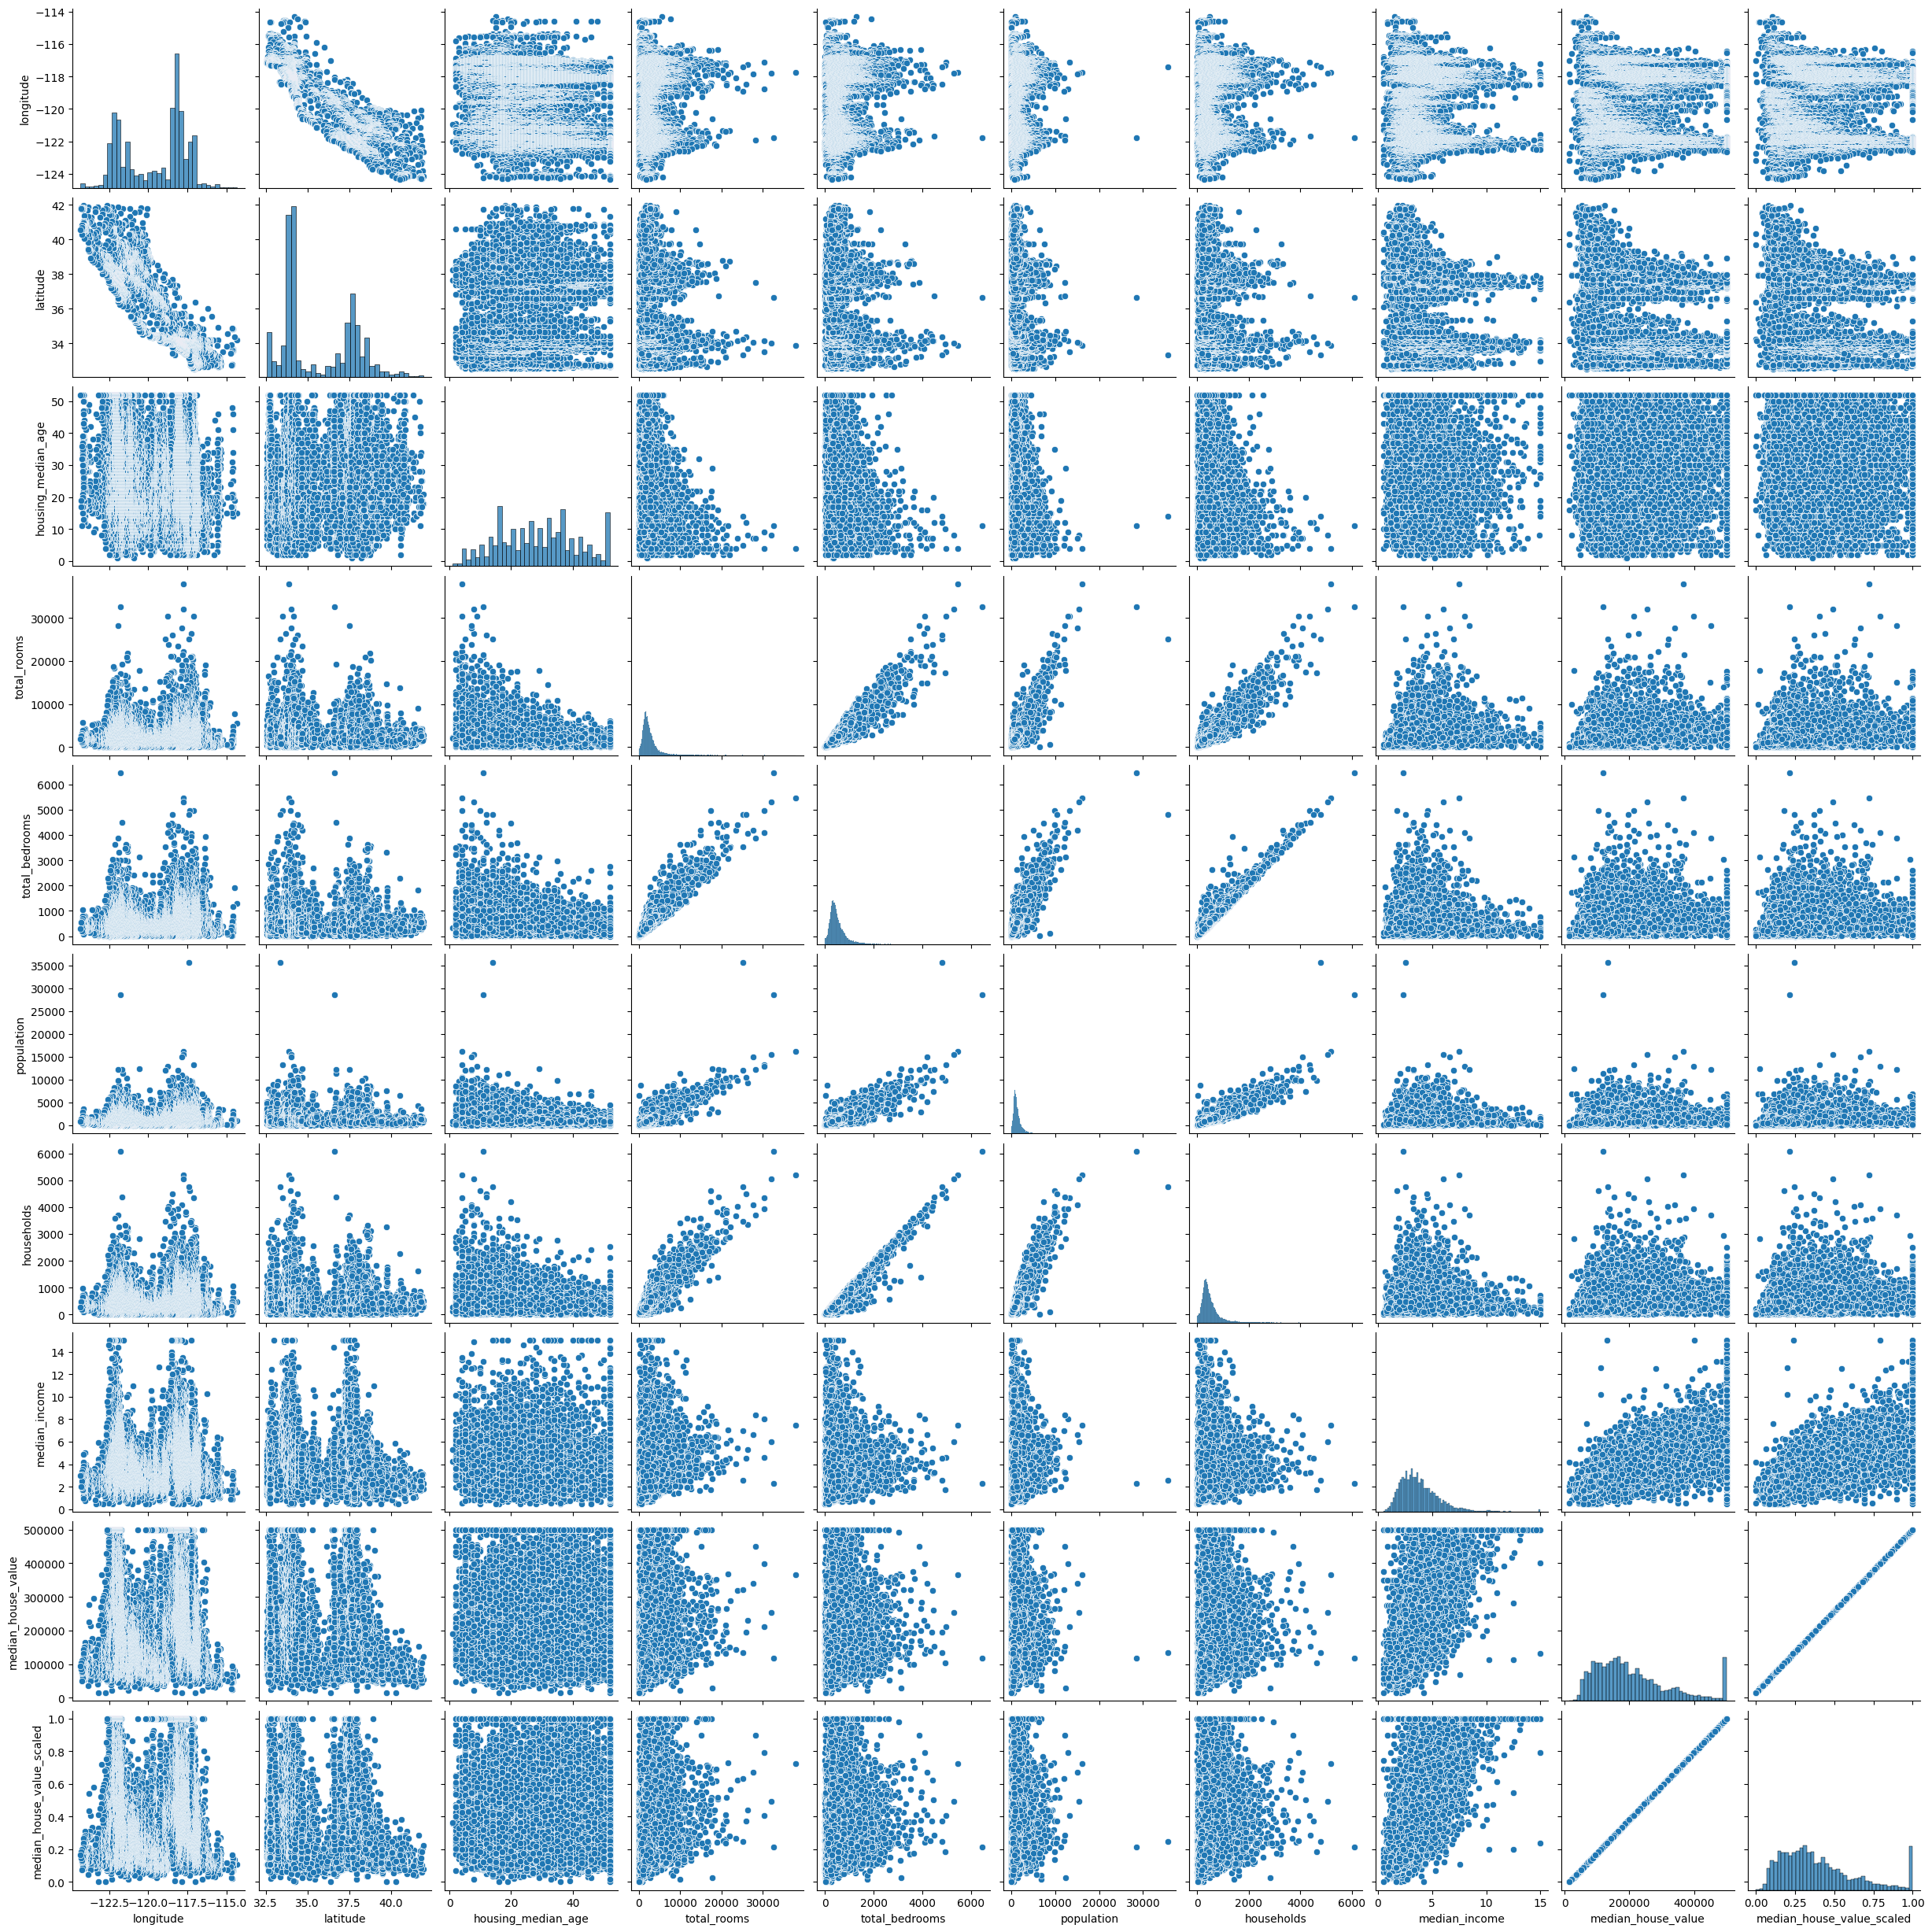


The pair plot shows scatterplots and histograms of the relationships between various features
in the California Housing dataset:

total_rooms vs. total_bedrooms, total_rooms vs. households, and population vs. households shows
high positive correlations with each other.
This indicates homes with more rooms would likely have more people and households.

However, none of these features (total_rooms, total_bedrooms, households and population)
exhibit a strong direct correlation with median_house_value, suggesting that they might
need to be combined or normalized to extract more useful signals.

The strongest relationship with house prices appears to be median_income.
The scatter plot between median_income and median_house_value shows a clear positive correlation.
This makes sense because wealthier households usually live in areas with more expensive homes.

The median_income feature is likely the most important for predicting house prices.



In [ ]:
#@title Code - View pairplot

# Create a pair plot
sns.pairplot(df)
plt.show()

answer = '''
The pair plot shows scatterplots and histograms of the relationships between various features
in the California Housing dataset:

total_rooms vs. total_bedrooms, total_rooms vs. households, and population vs. households shows
high positive correlations with each other.
This indicates homes with more rooms would likely have more people and households.

However, none of these features (total_rooms, total_bedrooms, households and population)
exhibit a strong direct correlation with median_house_value, suggesting that they might
need to be combined or normalized to extract more useful signals.

The strongest relationship with house prices appears to be median_income.
The scatter plot between median_income and median_house_value shows a clear positive correlation.
This makes sense because wealthier households usually live in areas with more expensive homes.

The median_income feature is likely the most important for predicting house prices.
'''

print(answer)



# Part 3 - Train Model


---



# **## Your Task: Define functions to build and train a model**



In [ ]:
#@title Code - Define ML functions

import tensorflow as tf
from tensorflow import keras


def build_model(my_learning_rate, num_features):
    """Create and compile a simple linear regression model."""
    model = keras.models.Sequential()

    # Add a single Dense layer with a linear activation function.
    model.add(keras.layers.Dense(units=1, input_shape=(num_features,)))

    # Compile the model with RMSprop optimizer and MSE loss.
    model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=my_learning_rate),
                  loss="mean_squared_error",
                  metrics=[keras.metrics.RootMeanSquaredError()])

    return model


def train_model(model, features, label, epochs, batch_size):
    """Train the model by feeding it data."""

    # Train the model and save the training history.
    history = model.fit(x=features, y=label, batch_size=batch_size, epochs=epochs)

    # Get trained weights and bias.
    trained_weight = model.get_weights()[0]
    trained_bias = model.get_weights()[1]

    # Extract the list of epochs.
    epochs = history.epoch

    # Extract the RMSE for each epoch.
    hist = pd.DataFrame(history.history)
    rmse = hist["root_mean_squared_error"]

    return trained_weight, trained_bias, epochs, rmse


def run_experiment(df, feature_names, label_name, learning_rate, epochs, batch_size):
    """Run the experiment to build and train the model."""

    print(f'INFO: Starting training experiment with features={feature_names} and label={label_name}\n')

    num_features = len(feature_names)

    # Extract features and label as numpy arrays
    features = df[feature_names].values
    label = df[label_name].values

    # Build and train the model
    model = build_model(learning_rate, num_features)

    # Pass only the required arguments to train_model
    trained_weight, trained_bias, epochs, rmse = train_model(model, features, label, epochs, batch_size)

    print('\nTraining complete!')
    print(f'Weight: {trained_weight}, Bias: {trained_bias}')

    # call the make_plots function with the correct arguments
    make_plots(df, feature_names, label_name, (trained_weight, trained_bias, epochs, rmse))

    return model




def make_plots(df, feature_names, label_name, model_output):
    """Generate plots to visualize model's performance side by side."""

    trained_weight, trained_bias, epochs, rmse = model_output

    # Set up a figure with two subplots (1 row, 2 columns)
    fig, ax = plt.subplots(1, 2, figsize=(14, 6))  # 1 row, 2 columns

    # Plotting RMSE vs Epochs on the first subplot
    ax[0].plot(epochs, rmse, label="RMSE")
    ax[0].set_xlabel("Epochs")
    ax[0].set_ylabel("Root Mean Squared Error (RMSE)")
    ax[0].set_title("RMSE vs Epochs")
    ax[0].legend()
    ax[0].grid(True)

    # Plotting Predictions vs Actual Values on the second subplot
    feature = df[feature_names[0]].values
    label = df[label_name].values

    # Make predictions using the trained model (flatten to get 1D array)
    predictions = (trained_weight * feature + trained_bias).flatten()

    ax[1].scatter(feature, label, label='Actual values', color='blue', alpha=0.6)
    ax[1].plot(feature, predictions, label='Predicted values', color='red')
    ax[1].set_xlabel(feature_names[0])
    ax[1].set_ylabel(label_name)
    ax[1].set_title(f"Predictions vs Actual Values for {feature_names[0]}")
    ax[1].legend()
    ax[1].grid(True)

    # Display the plots
    plt.tight_layout()
    plt.show()






# **Your Task: Train a model with one feature**

In this step you will train a model to predict the housing price using a **single feature** (e.g., total_rooms)

Use the following hyperparameters:

learning_rate = 0.001,
epochs = 20,
batch_size = 50

**Instructions**

1. Build your model with one feature.
1. Review the output from the training run
1. **Check your understanding** by answering these questions:
  * How many epochs did it take to converge on the final model?
  * How well does the model fit the sample data?

During training, you should see the root mean square error (RMSE) in the output. The units for RMSE are the same as the units for the label (dollars). In other words, you can use the RMSE to determine how far off, on average, the predicted house prices are in dollars from the observed values.

INFO: Starting training experiment with features=['median_income'] and label=median_house_value_scaled

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 41.8928 - root_mean_squared_error: 6.4687
Epoch 2/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 23.1595 - root_mean_squared_error: 4.8052
Epoch 3/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 999us/step - loss: 9.6273 - root_mean_squared_error: 3.0915
Epoch 4/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.1882 - root_mean_squared_error: 1.4664
Epoch 5/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2865 - root_mean_squared_error: 0.5349  
Epoch 6/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1640 - root_mean_squared_error: 0.4045
Epoch 7/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0830 - root_mean_squared_error: 0.2876
Epoch 8/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0400 - root_mean_squared_error: 0.1999
Epoch 9/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0301 - root_mean_squared_error: 0.1736
Epoch 10/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0295 - root_mean_squared_error: 0

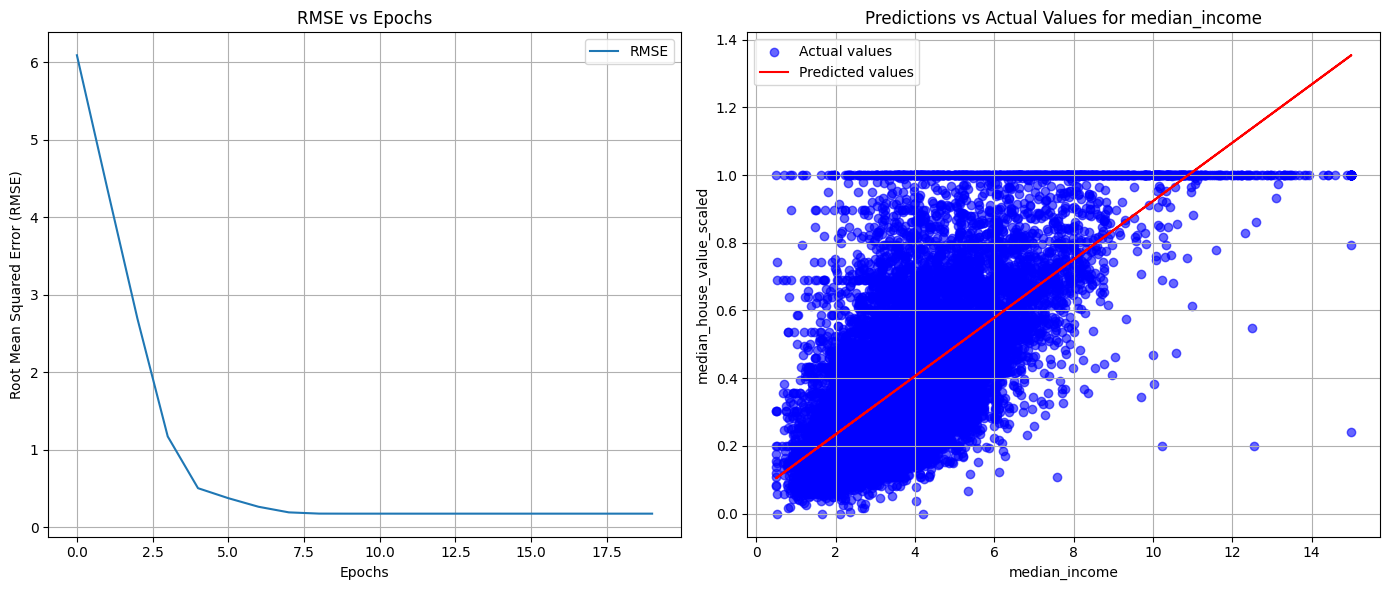


The model starts with a high loss and an RMSE, indicating it struggles to make accurate predictions.
However, it learns quickly, reducing the RMSE significantly by the fifth round of training, showing improvement.
By the end, the model highlights the importance of median_income and fine-tunes the predictions effectively.
Overall, it does a good job predicting median_house_value_scaled using median_income.

The model improved when the median_income was scaled.



In [ ]:
#@title Code - Experiment 1

# The following variables are the hyperparameters.
learning_rate = 0.001
epochs = 20
batch_size = 50


# 1. Build your model with one feature.
# median_income_scaled = scaler.fit_transform(df[['median_income']])

# Convert the scaled array back to a 1D array
# median_income_scaled = median_income_scaled.flatten()

# Specify the feature and the label.
training_df = pd.DataFrame({
    'median_income': df['median_income'],
    'median_house_value_scaled': df['median_house_value_scaled']
})

# Define the feature and target column names
feature_names = ['median_income']
label_name = 'median_house_value_scaled'


# Call the run_experiment function on the training data
model = run_experiment(training_df, feature_names, label_name, learning_rate, epochs, batch_size)


# Call the function to train the model
#model = run_experiment(training_df, feature_names, label_name, learning_rate, epochs, batch_size)

my_opinion = '''
The model starts with a high loss and an RMSE, indicating it struggles to make accurate predictions.
However, it learns quickly, reducing the RMSE significantly by the fifth round of training, showing improvement.
By the end, the model highlights the importance of median_income and fine-tunes the predictions effectively.
Overall, it does a good job predicting median_house_value_scaled using median_income.

The model improved when the median_income was scaled.
'''

print(my_opinion)


# **## Your Task: Experiment with hyperparameters**

It is common with machine learning to run multiple experiments to find the best set of hyperparmeters to train your model. In this step, try varying the hyperparameters one by one with this set of experiments:

* *Experiment 1:* **Increase** the learning rate to **``1``** (batch size at ``50``).
* *Experiment 2:* **Decrease** the learning rate to **``0.0001``** (batch size at ``50``).
* *Experiment 3:* **Increase** the batch size to **``500``** (learning rate at ``0.001``).

**Instructions**
1. Update the hyperparameter values
2. Execute your code.
3. After the training run, examine the output and note any differences you see in the loss curve or model output.
4. Repeat steps 1 - 3 for each hyperparameter experiment.
5. **Check your understanding** by answering these questions:
  * How did raising the learning rate impact your ability to train the model?
  * How did lowering the learning rate impact your ability to train the model?
  * Did changing the batch size effect your training results?


INFO: Starting training experiment with features=['median_income'] and label=median_house_value_scaled

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.8652 - root_mean_squared_error: 2.8976
Epoch 2/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.4515 - root_mean_squared_error: 2.5375
Epoch 3/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.5259 - root_mean_squared_error: 2.5515
Epoch 4/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.6612 - root_mean_squared_error: 2.5741
Epoch 5/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.8414 - root_mean_squared_error: 2.6103
Epoch 6/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 6.3491 - root_mean_squared_error: 2.5126
Epoch 7/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 6.3462 - root_mean_squared_error: 2.5118
Epoch 8/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.5221 - root_mean_squared_error: 2.5355
Epoch 9/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 6.6101 - root_mean_squared_error: 2.5692
Epoch 10/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.7145 - root_mean_squared_error: 2.5904


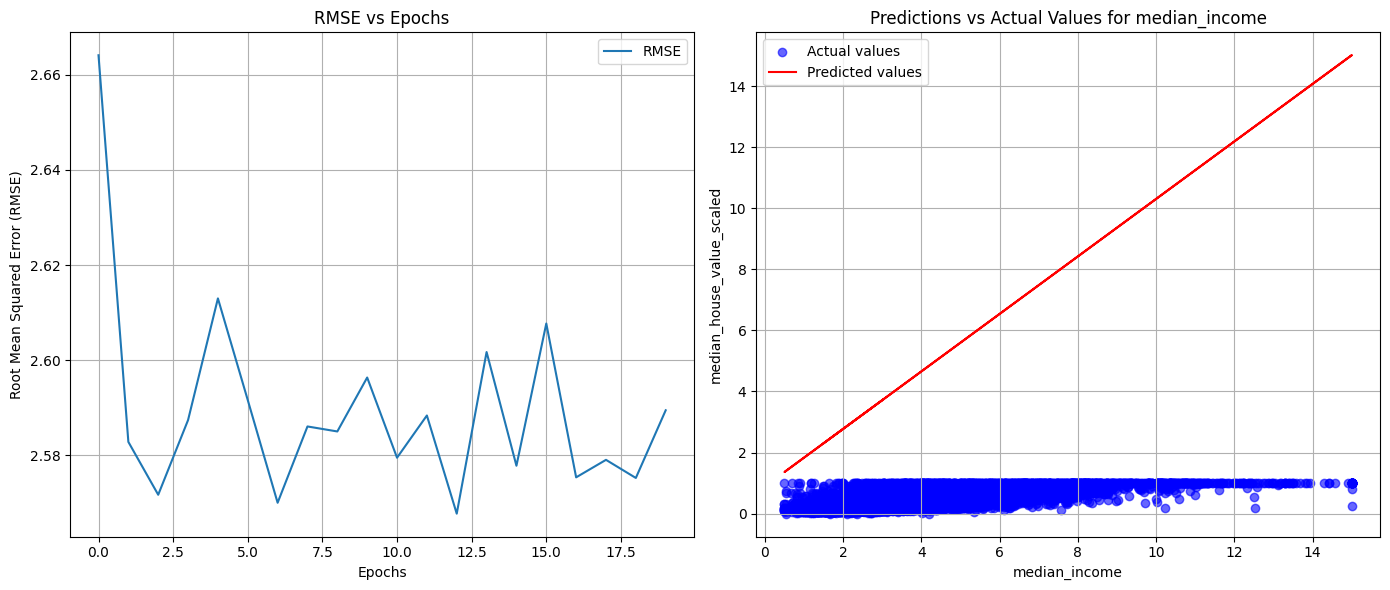


The loss and Root Mean Squared Error (RMSE) fluctuated rather than consistently improving.
These fluctuations suggest that the model might be hitting a local minimum where it cannot further
reduce the error efficiently.

Increasing the learning rate made the model overshoot the optimal point, leading to poor performance and
causing the loss to increase instead of decrease.




In [ ]:
#@title Code - Experiment 1

# The following variables are the hyperparameters.
learning_rate = 1.0
epochs = 20
batch_size = 50

# Call the function to train the model
model = run_experiment(training_df, feature_names, label_name, learning_rate, epochs, batch_size)

my_opinion = '''
The loss and Root Mean Squared Error (RMSE) fluctuated rather than consistently improving.
These fluctuations suggest that the model might be hitting a local minimum where it cannot further
reduce the error efficiently.

Increasing the learning rate made the model overshoot the optimal point, leading to poor performance and
causing the loss to increase instead of decrease.

'''
print(my_opinion)


INFO: Starting training experiment with features=['median_income'] and label=median_house_value_scaled

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 10.5504 - root_mean_squared_error: 3.2480
Epoch 2/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 9.3970 - root_mean_squared_error: 3.0653
Epoch 3/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 8.2537 - root_mean_squared_error: 2.8729  
Epoch 4/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 7.4486 - root_mean_squared_error: 2.7289
Epoch 5/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 6.4748 - root_mean_squared_error: 2.5444  
Epoch 6/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 5.6136 - root_mean_squared_error: 2.3690
Epoch 7/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 4.7680 - root_mean_squared_error: 2.1834
Epoch 8/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.0248 - root_mean_squared_error: 2.0060
Epoch 9/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.3664 - root_mean_squared_error: 1.8346
Epoch 10/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.8099 - root_mean_squared_error: 1.

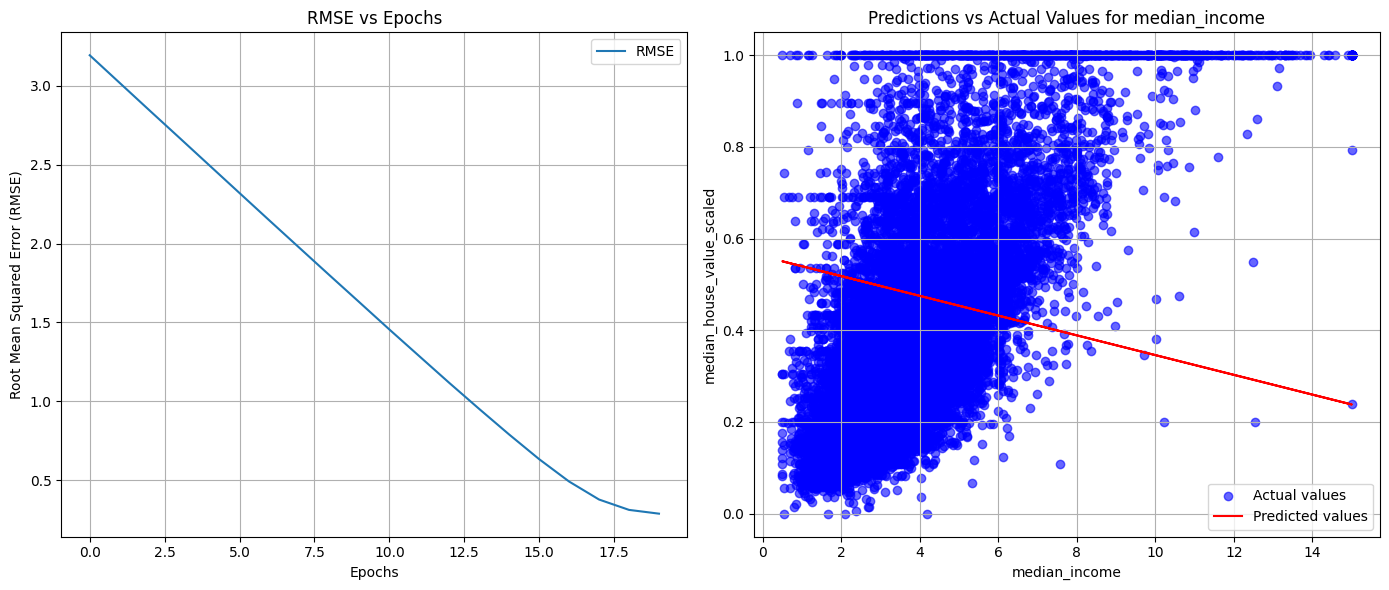


By Epoch 20, the loss has dropped to 0.0420, and the RMSE has reached 0.2049,
indicating that the model's predictions have improved significantly compared
to its starting point which was relatively high (loss: 4.3413, RMSE: 2.0835).

The trend shows that the model is learning to minimize the error, and both the loss and RMSE
are gradually approaching lower values as training progresses.



In [ ]:
#@title Code - Experiment 2
# The following variables are the hyperparameters.
learning_rate = 0.0001
epochs = 20
batch_size = 50

# Call the function to train the model
model = run_experiment(training_df, feature_names, label_name, learning_rate, epochs, batch_size)
#model = run_experiment(training_df, feature_names, label_name, learning_rate, epochs, batch_size)

my_opinion = '''
By Epoch 20, the loss has dropped to 0.0420, and the RMSE has reached 0.2049,
indicating that the model's predictions have improved significantly compared
to its starting point which was relatively high (loss: 4.3413, RMSE: 2.0835).

The trend shows that the model is learning to minimize the error, and both the loss and RMSE
are gradually approaching lower values as training progresses.
'''

print(my_opinion)

INFO: Starting training experiment with features=['median_income'] and label=median_house_value_scaled

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.8995 - root_mean_squared_error: 3.1463    
Epoch 2/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.7270 - root_mean_squared_error: 2.9541 
Epoch 3/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.8017 - root_mean_squared_error: 2.7930 
Epoch 4/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.6929 - root_mean_squared_error: 2.5870 
Epoch 5/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.9699 - root_mean_squared_error: 2.4431 
Epoch 6/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.1579 - root_mean_squared_error: 2.2710 
Epoch 7/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.4779 - root_mean_squared_error: 2.1156 
Epoch 8/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.7224 - root_mean_squared_error: 1.9291 
Epoch 9/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.0725 - root_mean_squared_error: 1.7526 
Epoch 10/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.4489 - root_mean_squared_error: 1.5648 
Epoch 1

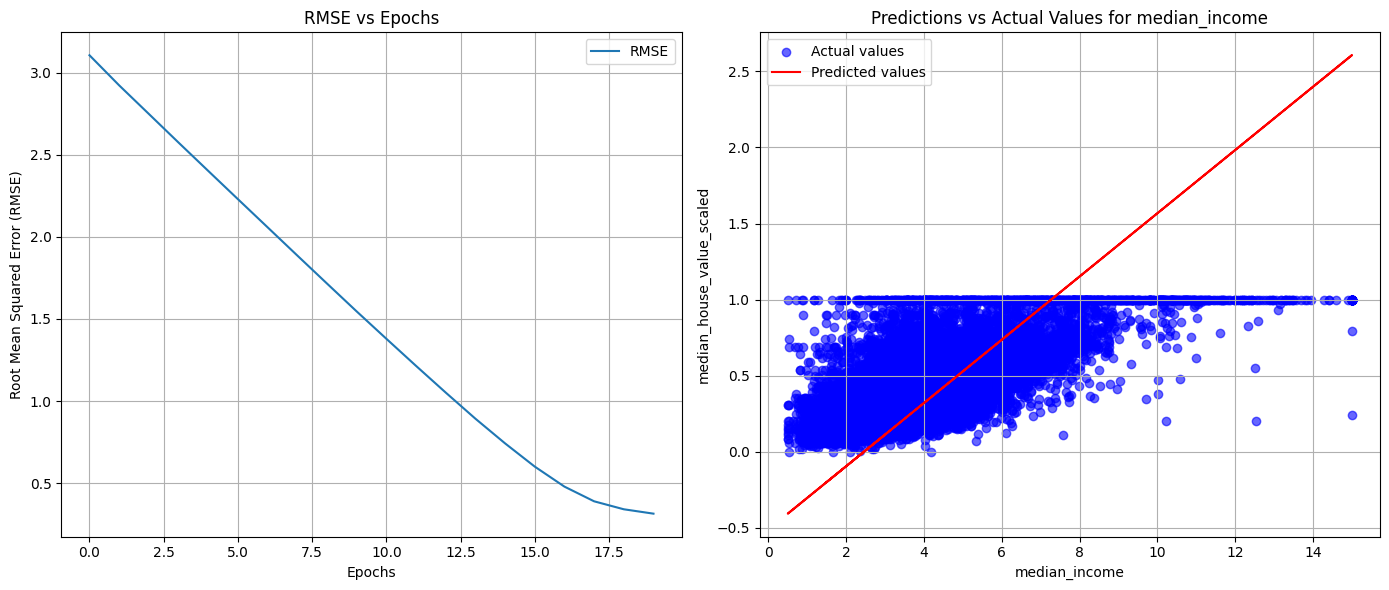


The loss starts high ndicating that initially, the model's predictions are far from the true values but gradually improves,
lowering both the loss and RMSE over the 20 epochs. The RMSE drops from 5.9092 in Epoch 1 to 2.6100 in Epoch 20,
showing significant learning and improved accuracy during training.



In [ ]:
#@title Code - Experiment 3
# The following variables are the hyperparameters.
learning_rate = 0.001
epochs = 20
batch_size = 500

# Call the function to train the model
model = run_experiment(training_df, feature_names, label_name, learning_rate, epochs, batch_size)

my_opinion = '''
The loss starts high ndicating that initially, the model's predictions are far from the true values but gradually improves,
lowering both the loss and RMSE over the 20 epochs. The RMSE drops from 5.9092 in Epoch 1 to 2.6100 in Epoch 20,
showing significant learning and improved accuracy during training.
'''

print(my_opinion)



# **## Your Task Train a model with the "Population" feature**

Report your findings





In [ ]:
# The following variables are the hyperparameters.
learning_rate = 0.001
epochs = 20
batch_size = 50

# Specify the feature and the label.
training_population_df = pd.DataFrame({'population': df['population'], 'median_house_value_scaled': df['median_house_value_scaled']})

# Define the feature and target column names
feature_names = ['population']
label_name = 'median_house_value_scaled'

# Call the function to train the model
model = run_experiment(training_population_df, feature_names, label_name, learning_rate, epochs, batch_size)

my_opinion = '''
By Epoch 3, the RMSE had dropped to under 1, and from Epochs 4 to 12, the error continued to decrease slightly but then
began to fluctuate. After Epoch 12, the RMSE oscillated between 0.83 and 0.95, indicating that the model had converged
without showing further significant improvement.
'''

print (my_opinion)

INFO: Starting training experiment with features=['population'] and label=median_house_value_scaled

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 855660.7500 - root_mean_squared_error: 921.7125
Epoch 2/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 150214.2500 - root_mean_squared_error: 382.1042
Epoch 3/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 10.0162 - root_mean_squared_error: 2.7813
Epoch 4/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2307 - root_mean_squared_error: 1.1063
Epoch 5/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0924 - root_mean_squared_error: 1.0429
Epoch 6/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.0196 - root_mean_squared_error: 1.0026
Epoch 7/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9243 - root_mean_squared_error: 0.9576
Epoch 8/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.8265 - root_mean_squared_error: 0.8985
Epoch 9/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0027 - root_mean_squared_error: 0.9965
Epoch 10/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.7788 - root_mean_squared

# Part 4 - Validate Model


---



# **Your Task: Use the model to make predictions**

Now that you have a trained model, you can use the model to make predictions. In practice, you should make predictions on examples that are not used during training. However, for this exercise, you'll just work with a subset of the same training dataset. In another Colab exercise you will explore ways to make predictions on examples not used in training.

1. **Check your understanding** by answering these questions:
  * How close is the predicted value to the label value? In other words, does your model accurately predict the housing price?

In [ ]:
#@title Code - Define functions to make predictions

def format_currency(x):
    """Format the value as currency."""
    return "${:.2f}".format(x)

def build_batch(df, batch_size):
    """Create a batch of data by sampling from the dataframe."""
    batch = df.sample(n=batch_size).copy()
    batch.set_index(np.arange(batch_size), inplace=True)
    return batch

def predict_housing_price(model, df, features, label, batch_size=50):
    """Predict housing prices using the trained model and a batch of data."""
    # Build a batch from the data
    batch = build_batch(df, batch_size)

    # Make predictions using the model
    predicted_values = model.predict_on_batch(x=batch.loc[:, features].values)

    # Prepare a dictionary to hold predictions, actual values, and the loss
    data = {"PREDICTED_PRICE": [], "OBSERVED_PRICE": [], "L1_LOSS": [], "POPULATION": []}

    for i in range(batch_size):
        predicted = predicted_values[i][0]  # Get the predicted value
        observed = batch.at[i, label]  # Get the actual value

        # Store formatted predictions, observed values, and L1 loss (absolute error)
        data["PREDICTED_PRICE"].append(format_currency(predicted))
        data["OBSERVED_PRICE"].append(format_currency(observed))
        data["L1_LOSS"].append(format_currency(abs(observed - predicted)))
        data["POPULATION"].append(int(batch.at[i, features[0]]))  # Add the population feature value

    # Create a DataFrame to display the predictions and the observed values
    output_df = pd.DataFrame(data)
    return output_df

def show_predictions(output_df):
    """Display the predictions and actual values."""
    header = "-" * 80
    banner = header + "\n" + "|" + "HOUSING PRICE PREDICTIONS".center(78) + "|" + "\n" + header
    print(banner)
    print(output_df)
    return



In [ ]:
#@title Code - Make predictions
feature_names = ['median_income']
label_name = 'median_house_value_scaled'


# Make predictions using a batch size of 20
predictions_output = predict_housing_price(model, training_df, feature_names, label_name, batch_size=20)

# Display the predictions alongside the actual values
show_predictions(predictions_output)



In [ ]:
#@title Double-click to view answers for validate model

# How close is the predicted value to the label value?
# -----------------------------------------------------------------------------
answer = '''
The model consistently predicts a price of $0.25 for all instances, regardless of the observed price.

The L1 Loss values indicate the absolute difference between the predicted and observed prices.
A lower L1 Loss signifies closer predictions, but many instances show losses as high as $0.75, indicating substantial prediction errors.

The model is not accurately predicting housing prices since the predicted value of $0.25 does not adjust according to the variations in the observed prices.

Overall, the model struggles to accurately predict housing prices based on the population feature.
'''

print(answer)

# **Your Task (Optional): Bonus Grades**

1. Try to train your model on the basis of multiple features (you can check from the coorelation matrix which features give you a strong indication of relationship with the label).
2. After training your model with multiple features, test your model and report your findings.
3. You may also tweak the hyperparameters to see what works best

Report your findings.


In [ ]:
#@title Define the Functions for multiple features - Model Training

from tensorflow.keras import layers, models, optimizers

def prepare_data(df, feature_names, label_name):
    """Splits the dataset into features and labels based on column names."""
    features = df[feature_names].values  # Extract the feature columns
    labels = df[label_name].values  # Extract the target (label) column
    return features, labels

# Function to build and compile the model
def build_model(feature_count, learning_rate):
    """Builds a simple neural network model for regression."""
    model = models.Sequential()

    # Input layer that matches the number of features
    model.add(layers.Input(shape=(feature_count,)))  # Use shape instead of input_shape

    # Hidden layer with 128 units and ReLU activation
    model.add(layers.Dense(units=128, activation='relu'))

    # Output layer (single unit for regression)
    model.add(layers.Dense(units=1))

    # Compile the model with Adam optimizer and mean squared error loss
    model.compile(optimizer=optimizers.Adam(learning_rate=learning_rate),
                  loss='mean_squared_error',
                  metrics=['mae'])  # MAE for easier interpretation

    return model

# Function to train the model
def train_model(features, labels, feature_names, learning_rate, epochs, batch_size):
    """Builds and trains the model using the provided features and labels."""
    # Build the model
    feature_count = len(feature_names)  # Number of input features
    model = build_model(feature_count, learning_rate)

    # Check data shape
    print("Feature data shape:", features.shape)
    print("Label data shape:", labels.shape)

    # Ensure that features are 2D and labels are 1D
    assert features.ndim == 2, "Features should be a 2D array"
    assert labels.ndim == 1, "Labels should be a 1D array"

    # Train the model
    history = model.fit(features, labels, epochs=epochs, batch_size=batch_size, verbose=1)

    return model, history

# Function to plot training history
def plot_training_history(history):
    """Plot training loss and metrics."""
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['mae'], label='Mean Absolute Error (MAE)')
    plt.title('Training Progress')
    plt.xlabel('Epochs')
    plt.ylabel('Loss / Error')
    plt.legend()
    plt.show()




Feature data shape: (17000, 3)
Label data shape: (17000,)
Epoch 1/50
532/532 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0419 - mae: 0.1542
Epoch 2/50
532/532 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0268 - mae: 0.1224
Epoch 3/50
532/532 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0276 - mae: 0.1240
Epoch 4/50
532/532 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0262 - mae: 0.1205
Epoch 5/50
532/532 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0266 - mae: 0.1217
Epoch 6/50
532/532 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0263 - mae: 0.1207
Epoch 7/50
532/532 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0269 - mae: 0.1223
Epoch 8/50
532/532 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0256 - mae: 0.1194
Epoch 9/50
532/532 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0252 - mae: 0.1177
Epoch 10/50
532/532 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0259 - mae: 0.1196
Epoch 11/50
532/532 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0258 - mae: 0.1196
Epoch 12/50
532/532 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/s

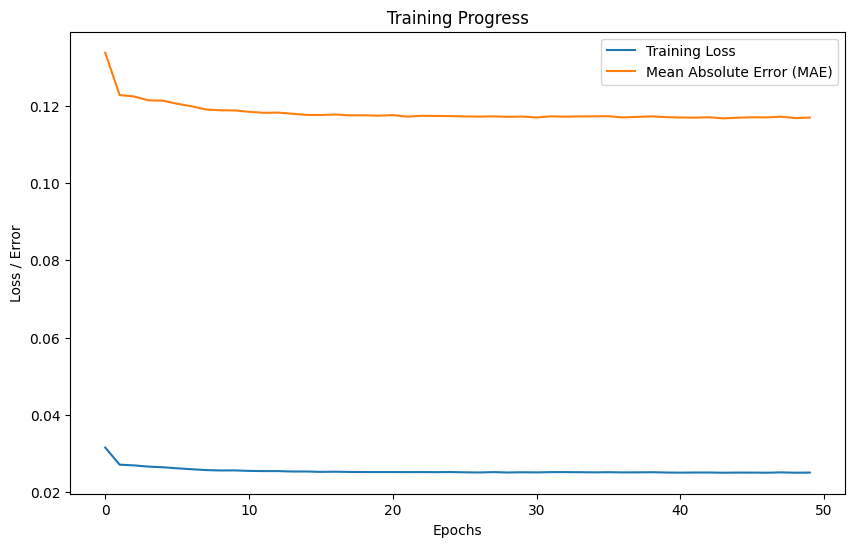

In [ ]:
# Select the features based on the correlation matrix
selected_features = ['median_income', 'total_rooms', 'housing_median_age']

# Set hyperparameters
learning_rate = 0.001
epochs = 50
batch_size = 32


# Prepare the new training dataset
training_df = pd.DataFrame({
    'median_income': df['median_income'],
    'total_rooms': df['total_rooms'],
    'housing_median_age': df['housing_median_age'],
    'median_house_value_scaled': df['median_house_value_scaled']
})

# Prepare features and labels
features, labels = prepare_data(training_df, selected_features, 'median_house_value_scaled')

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Scale the features using MinMaxScaler
features_scaled = scaler.fit_transform(features)

# Train the model using the scaled features
model, history = train_model(features_scaled, labels, selected_features, learning_rate, epochs, batch_size)

# Plot the training history
plot_training_history(history)


In [ ]:
scaler = MinMaxScaler()
scaler.fit(training_df[feature_names])  # Fit on training features

def predict_prices(model, df, features, label, batch_size=50):
    # Build a batch from the dataset
    batch = df.sample(n=batch_size).copy()
    batch.set_index(np.arange(batch_size), inplace=True)

    # Scale the features of the batch
    scaled_features = scaler.transform(batch.loc[:, features])

    # Predict using the model
    predicted_values = model.predict_on_batch(x=scaled_features)

    # Collect the results in a DataFrame
    data = {
        "PREDICTED_PRICE": [],
        "OBSERVED_PRICE": [],
        "L1_LOSS": []
    }
    for i in range(batch_size):
        predicted = predicted_values[i][0]
        observed = batch.at[i, label]
        data["PREDICTED_PRICE"].append(format_currency(predicted))
        data["OBSERVED_PRICE"].append(format_currency(observed))
        data["L1_LOSS"].append(format_currency(abs(observed - predicted)))

    output_df = pd.DataFrame(data)
    return output_df

output = predict_prices(model, training_df, feature_names, label_name)
print(output)

findings = '''
This model was trained for 50 epochs, and it got better at predicting over time. In the first epoch, the loss was 0.0457 and the mean
absolute error (MAE) was 0.1586. By the end, the loss dropped to 0.0257 and the MAE improved to 0.1189, showing that the model was learning well.
The predicted prices were often close to the actual prices, with some predictions being spot on (L1 loss of zero). Overall, the model performed well,
demonstrating its ability to make accurate predictions based on the training data. This prediction is significantly better than the previous attempt
that used just one feature, highlighting the advantage of using three features for more accurate results.
'''

print(findings)

ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense_5" is incompatible with the layer: expected axis -1 of input shape to have value 3, but received input with shape (50, 1)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(50, 1), dtype=float32)
  • training=False
  • mask=None